In [61]:
!pip install imageio

Looking in indexes: https://pypi.org/simple, https://legacy.pypi.org/simple


In [0]:
import numpy as np
import random
import matplotlib.pyplot as plt
import imageio
import glob
import os
import scipy.io
from scipy import signal
from scipy import ndimage
import math
from keras.utils import to_categorical #for one hot encoding
from keras import optimizers, initializers

#To make it compatible with jupyter notebook
%matplotlib inline
# Fixing random state for reproducibility\n
np.random.seed(1)

In [0]:
import pickle
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical
from keras.models import Model
from keras.utils import np_utils

## Load DataSet

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()

In [0]:
train_set_X = train_features
train_set_Y = train_labels
test_set_X = test_features
test_set_Y = test_labels

In [66]:
def print_shapes_of_dataset():
  print("Train X shape: \t" + str(train_set_X.shape))
  print("Train Y shape: \t" + str(train_set_Y.shape))
  print("Test X shape: \t" + str(test_set_X.shape))
  print("Test Y shape: \t" + str(test_set_Y.shape))

print_shapes_of_dataset()

Train X shape: 	(50000, 32, 32, 3)
Train Y shape: 	(50000, 1)
Test X shape: 	(10000, 32, 32, 3)
Test Y shape: 	(10000, 1)


In [67]:
input_shape = train_set_X.shape[1:]
print(input_shape)

(32, 32, 3)


In [68]:
# one hot encode
encoded_train_Y = to_categorical(train_set_Y)
encoded_train_Y = encoded_train_Y.reshape(encoded_train_Y.shape[0], encoded_train_Y.shape[1])

print(encoded_train_Y.shape)

# one hot encode
encoded_test_Y = to_categorical(test_set_Y)
encoded_test_Y = encoded_test_Y.reshape(encoded_test_Y.shape[0], encoded_test_Y.shape[1])

print(encoded_test_Y.shape)

(50000, 10)
(10000, 10)


## Own Network Architecture

In [0]:
#Define model
model = Sequential()

#Add a convolution layer to the model with 32 filters of size 3*3
#Default stride is assumed
model.add(Conv2D(32, kernel_size = (3, 3),
                 activation = 'relu',
                 input_shape = input_shape,
                 name = 'conv_layer_1', kernel_initializer = initializers.TruncatedNormal(mean=0.0, stddev=0.05, seed=None)))

model.add(Conv2D(32, kernel_size = (3, 3),
                 activation = 'relu',
                 input_shape = input_shape,
                 name = 'conv_layer_2', kernel_initializer = initializers.TruncatedNormal(mean=0.0, stddev=0.05, seed=None)))

#Add max pooling to the output of the previous layer
model.add(MaxPooling2D(name='max_pool_layer_1'))

#Add a convolution layer to the model with 32 filters of size 3*3
#Default stride is assumed
model.add(Conv2D(64, kernel_size = (3, 3),
                 activation = 'relu',
                 name = 'conv_layer_3', kernel_initializer = initializers.TruncatedNormal(mean=0.0, stddev=0.05, seed=None)))

model.add(Conv2D(64, kernel_size = (3, 3),
                 activation = 'relu',
                 name = 'conv_layer_4', kernel_initializer = initializers.TruncatedNormal(mean=0.0, stddev=0.05, seed=None)))

#Add max pooling to the output of the previous layer
model.add(MaxPooling2D(name='max_pool_layer_2'))

#Add a convolution layer to the model with 32 filters of size 3*3
#Default stride is assumed
model.add(Conv2D(128, kernel_size = (3, 3),
                 activation = 'relu',
                 name = 'conv_layer_5', kernel_initializer = initializers.TruncatedNormal(mean=0.0, stddev=0.05, seed=None)))

#Add max pooling to the output of the previous layer
model.add(MaxPooling2D(name = 'max_pool_layer_3'))

#Add a layer that will flatten out the tensor
model.add(Flatten(name = 'flatten_layer_1'))

#Add a final dense layer that will be used for prediction
model.add(Dense(1024, activation = 'relu', name='dense_layer_1', kernel_initializer = initializers.TruncatedNormal(mean=0.0, stddev=0.05, seed=None)))

#Add a final dense layer that will be used for prediction
model.add(Dense(encoded_train_Y.shape[1], activation = 'softmax',name='final_layer', kernel_initializer = initializers.TruncatedNormal(mean=0.0, stddev=0.05, seed=None)))

In [70]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_layer_1 (Conv2D)        (None, 30, 30, 32)        896       
_________________________________________________________________
conv_layer_2 (Conv2D)        (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pool_layer_1 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv_layer_3 (Conv2D)        (None, 12, 12, 64)        18496     
_________________________________________________________________
conv_layer_4 (Conv2D)        (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pool_layer_2 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv_layer_5 (Conv2D)        (None, 3, 3, 128)         73856     
__________

## Training Model

In [0]:
#Compile the model tell which loss to use and the optimizer and a evaluation metric if any
model.compile(loss = 'categorical_crossentropy',
              optimizer = optimizers.SGD(lr=0.001, decay=1e-6),
              metrics=['accuracy'])

In [72]:
history_1 = model.fit(train_set_X, encoded_train_Y,
          batch_size = 100,
          epochs = 200,
          validation_data = (test_set_X, encoded_test_Y))

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 20s 407us/step - loss: 2.0614 - acc: 0.2486 - val_loss: 1.8819 - val_acc: 0.3260
Epoch 2/200
41000/50000 [=======================>......] - ETA: 3s - loss: 1.8410 - acc: 0.3384

50000/50000 [==============================] - 19s 376us/step - loss: 1.8253 - acc: 0.3432 - val_loss: 1.7405 - val_acc: 0.3799
Epoch 3/200
50000/50000 [==============================] - 19s 379us/step - loss: 1.6864 - acc: 0.3936 - val_loss: 1.6451 - val_acc: 0.4108
Epoch 4/200
20000/50000 [===========>..................] - ETA: 10s - loss: 1.6142 - acc: 0.4170

50000/50000 [==============================] - 19s 379us/step - loss: 1.5956 - acc: 0.4260 - val_loss: 1.5545 - val_acc: 0.4383
Epoch 5/200
50000/50000 [==============================] - 19s 378us/step - loss: 1.5354 - acc: 0.4474 - val_loss: 1.5059 - val_acc: 0.4572
Epoch 6/200
16100/50000 [========>.....................] - ETA: 11s - loss: 1.4910 - acc: 0.4660

50000/50000 [==============================] - 19s 373us/step - loss: 1.4829 - acc: 0.4703 - val_loss: 1.4854 - val_acc: 0.4610
Epoch 7/200
50000/50000 [==============================] - 19s 379us/step - loss: 1.4377 - acc: 0.4857 - val_loss: 1.4339 - val_acc: 0.4826
Epoch 8/200
14200/50000 [=======>......................] - ETA: 12s - loss: 1.4058 - acc: 0.4968

50000/50000 [==============================] - 19s 377us/step - loss: 1.4028 - acc: 0.4981 - val_loss: 1.3983 - val_acc: 0.4997
Epoch 9/200
50000/50000 [==============================] - 19s 375us/step - loss: 1.3631 - acc: 0.5159 - val_loss: 1.3747 - val_acc: 0.5053
Epoch 10/200
14500/50000 [=======>......................] - ETA: 13s - loss: 1.3312 - acc: 0.5260

50000/50000 [==============================] - 19s 389us/step - loss: 1.3334 - acc: 0.5285 - val_loss: 1.3361 - val_acc: 0.5230
Epoch 11/200
50000/50000 [==============================] - 19s 381us/step - loss: 1.2996 - acc: 0.5414 - val_loss: 1.3421 - val_acc: 0.5158
Epoch 12/200
13900/50000 [=======>......................] - ETA: 12s - loss: 1.2822 - acc: 0.5439

50000/50000 [==============================] - 19s 387us/step - loss: 1.2739 - acc: 0.5496 - val_loss: 1.2879 - val_acc: 0.5417
Epoch 13/200
50000/50000 [==============================] - 19s 389us/step - loss: 1.2475 - acc: 0.5609 - val_loss: 1.2690 - val_acc: 0.5512
Epoch 14/200
12600/50000 [======>.......................] - ETA: 12s - loss: 1.2524 - acc: 0.5599

50000/50000 [==============================] - 19s 389us/step - loss: 1.2274 - acc: 0.5689 - val_loss: 1.2583 - val_acc: 0.5545
Epoch 15/200
50000/50000 [==============================] - 19s 383us/step - loss: 1.2025 - acc: 0.5780 - val_loss: 1.2408 - val_acc: 0.5644
Epoch 16/200
12300/50000 [======>.......................] - ETA: 13s - loss: 1.1887 - acc: 0.5833

50000/50000 [==============================] - 20s 392us/step - loss: 1.1845 - acc: 0.5823 - val_loss: 1.2223 - val_acc: 0.5706
Epoch 17/200
50000/50000 [==============================] - 20s 392us/step - loss: 1.1672 - acc: 0.5901 - val_loss: 1.2793 - val_acc: 0.5423
Epoch 18/200
12400/50000 [======>.......................] - ETA: 13s - loss: 1.1268 - acc: 0.6054

50000/50000 [==============================] - 19s 382us/step - loss: 1.1417 - acc: 0.6005 - val_loss: 1.2580 - val_acc: 0.5612
Epoch 19/200
50000/50000 [==============================] - 20s 391us/step - loss: 1.1263 - acc: 0.6068 - val_loss: 1.2093 - val_acc: 0.5796
Epoch 20/200
13100/50000 [======>.......................] - ETA: 13s - loss: 1.1201 - acc: 0.6118

50000/50000 [==============================] - 20s 394us/step - loss: 1.1125 - acc: 0.6133 - val_loss: 1.1659 - val_acc: 0.5934
Epoch 21/200
50000/50000 [==============================] - 19s 385us/step - loss: 1.0930 - acc: 0.6184 - val_loss: 1.1593 - val_acc: 0.5932
Epoch 22/200
12700/50000 [======>.......................] - ETA: 13s - loss: 1.0692 - acc: 0.6238

50000/50000 [==============================] - 19s 381us/step - loss: 1.0768 - acc: 0.6258 - val_loss: 1.1913 - val_acc: 0.5878
Epoch 23/200
50000/50000 [==============================] - 19s 371us/step - loss: 1.0625 - acc: 0.6283 - val_loss: 1.2089 - val_acc: 0.5828
Epoch 24/200
13800/50000 [=======>......................] - ETA: 12s - loss: 1.0468 - acc: 0.6335

50000/50000 [==============================] - 19s 376us/step - loss: 1.0513 - acc: 0.6321 - val_loss: 1.1368 - val_acc: 0.6051
Epoch 25/200
50000/50000 [==============================] - 19s 372us/step - loss: 1.0380 - acc: 0.6386 - val_loss: 1.1577 - val_acc: 0.5952
Epoch 26/200
13800/50000 [=======>......................] - ETA: 12s - loss: 1.0237 - acc: 0.6441

50000/50000 [==============================] - 19s 371us/step - loss: 1.0244 - acc: 0.6440 - val_loss: 1.1653 - val_acc: 0.5950
Epoch 27/200
50000/50000 [==============================] - 19s 375us/step - loss: 1.0095 - acc: 0.6480 - val_loss: 1.1177 - val_acc: 0.6145
Epoch 28/200
14200/50000 [=======>......................] - ETA: 12s - loss: 0.9972 - acc: 0.6540

50000/50000 [==============================] - 19s 373us/step - loss: 0.9983 - acc: 0.6525 - val_loss: 1.1397 - val_acc: 0.6048
Epoch 29/200
50000/50000 [==============================] - 19s 372us/step - loss: 0.9850 - acc: 0.6581 - val_loss: 1.0978 - val_acc: 0.6218
Epoch 30/200
14400/50000 [=======>......................] - ETA: 12s - loss: 0.9604 - acc: 0.6675

50000/50000 [==============================] - 19s 376us/step - loss: 0.9765 - acc: 0.6589 - val_loss: 1.1530 - val_acc: 0.5997
Epoch 31/200
50000/50000 [==============================] - 19s 373us/step - loss: 0.9682 - acc: 0.6643 - val_loss: 1.1421 - val_acc: 0.6078
Epoch 32/200
14700/50000 [=======>......................] - ETA: 12s - loss: 0.9419 - acc: 0.6731

50000/50000 [==============================] - 18s 368us/step - loss: 0.9514 - acc: 0.6688 - val_loss: 1.1103 - val_acc: 0.6218
Epoch 33/200
50000/50000 [==============================] - 19s 374us/step - loss: 0.9446 - acc: 0.6718 - val_loss: 1.1054 - val_acc: 0.6233
Epoch 34/200
14000/50000 [=======>......................] - ETA: 12s - loss: 0.9239 - acc: 0.6778

50000/50000 [==============================] - 19s 372us/step - loss: 0.9328 - acc: 0.6751 - val_loss: 1.1412 - val_acc: 0.6090
Epoch 35/200
50000/50000 [==============================] - 19s 376us/step - loss: 0.9209 - acc: 0.6810 - val_loss: 1.1686 - val_acc: 0.6023
Epoch 36/200
13500/50000 [=======>......................] - ETA: 12s - loss: 0.8969 - acc: 0.6867

50000/50000 [==============================] - 19s 375us/step - loss: 0.9111 - acc: 0.6849 - val_loss: 1.1734 - val_acc: 0.5989
Epoch 37/200
50000/50000 [==============================] - 19s 373us/step - loss: 0.9006 - acc: 0.6877 - val_loss: 1.0887 - val_acc: 0.6316
Epoch 38/200
13500/50000 [=======>......................] - ETA: 12s - loss: 0.8982 - acc: 0.6877

50000/50000 [==============================] - 19s 372us/step - loss: 0.8916 - acc: 0.6891 - val_loss: 1.1008 - val_acc: 0.6259
Epoch 39/200
50000/50000 [==============================] - 19s 377us/step - loss: 0.8814 - acc: 0.6952 - val_loss: 1.0933 - val_acc: 0.6319
Epoch 40/200
13700/50000 [=======>......................] - ETA: 12s - loss: 0.8707 - acc: 0.6950

50000/50000 [==============================] - 19s 375us/step - loss: 0.8744 - acc: 0.6961 - val_loss: 1.0793 - val_acc: 0.6318
Epoch 41/200
50000/50000 [==============================] - 19s 372us/step - loss: 0.8647 - acc: 0.7004 - val_loss: 1.0844 - val_acc: 0.6306
Epoch 42/200
13400/50000 [=======>......................] - ETA: 12s - loss: 0.8727 - acc: 0.7005

50000/50000 [==============================] - 19s 374us/step - loss: 0.8606 - acc: 0.7011 - val_loss: 1.0877 - val_acc: 0.6278
Epoch 43/200
50000/50000 [==============================] - 19s 375us/step - loss: 0.8483 - acc: 0.7068 - val_loss: 1.0912 - val_acc: 0.6341
Epoch 44/200
13000/50000 [======>.......................] - ETA: 12s - loss: 0.8332 - acc: 0.7127

50000/50000 [==============================] - 19s 372us/step - loss: 0.8363 - acc: 0.7103 - val_loss: 1.1020 - val_acc: 0.6248
Epoch 45/200
50000/50000 [==============================] - 19s 372us/step - loss: 0.8308 - acc: 0.7122 - val_loss: 1.0760 - val_acc: 0.6360
Epoch 46/200
13900/50000 [=======>......................] - ETA: 12s - loss: 0.8185 - acc: 0.7157

50000/50000 [==============================] - 19s 380us/step - loss: 0.8222 - acc: 0.7149 - val_loss: 1.0991 - val_acc: 0.6285
Epoch 47/200
50000/50000 [==============================] - 19s 374us/step - loss: 0.8087 - acc: 0.7182 - val_loss: 1.1088 - val_acc: 0.6267
Epoch 48/200
13600/50000 [=======>......................] - ETA: 12s - loss: 0.7829 - acc: 0.7329

50000/50000 [==============================] - 19s 372us/step - loss: 0.8040 - acc: 0.7228 - val_loss: 1.1046 - val_acc: 0.6321
Epoch 49/200
50000/50000 [==============================] - 19s 382us/step - loss: 0.7956 - acc: 0.7235 - val_loss: 1.0730 - val_acc: 0.6406
Epoch 50/200
13800/50000 [=======>......................] - ETA: 13s - loss: 0.7763 - acc: 0.7336

50000/50000 [==============================] - 20s 393us/step - loss: 0.7873 - acc: 0.7279 - val_loss: 1.0669 - val_acc: 0.6452
Epoch 51/200
50000/50000 [==============================] - 19s 377us/step - loss: 0.7788 - acc: 0.7306 - val_loss: 1.0937 - val_acc: 0.6380
Epoch 52/200
14200/50000 [=======>......................] - ETA: 12s - loss: 0.7677 - acc: 0.7369

50000/50000 [==============================] - 19s 375us/step - loss: 0.7692 - acc: 0.7346 - val_loss: 1.0816 - val_acc: 0.6367
Epoch 53/200
50000/50000 [==============================] - 19s 371us/step - loss: 0.7619 - acc: 0.7378 - val_loss: 1.1002 - val_acc: 0.6331
Epoch 54/200
14000/50000 [=======>......................] - ETA: 12s - loss: 0.7373 - acc: 0.7443

50000/50000 [==============================] - 19s 379us/step - loss: 0.7546 - acc: 0.7390 - val_loss: 1.0622 - val_acc: 0.6448
Epoch 55/200
50000/50000 [==============================] - 19s 376us/step - loss: 0.7443 - acc: 0.7438 - val_loss: 1.0948 - val_acc: 0.6389
Epoch 56/200
13700/50000 [=======>......................] - ETA: 12s - loss: 0.7347 - acc: 0.7479

50000/50000 [==============================] - 19s 374us/step - loss: 0.7410 - acc: 0.7443 - val_loss: 1.1267 - val_acc: 0.6268
Epoch 57/200
50000/50000 [==============================] - 19s 374us/step - loss: 0.7295 - acc: 0.7495 - val_loss: 1.0682 - val_acc: 0.6481
Epoch 58/200
13300/50000 [======>.......................] - ETA: 12s - loss: 0.7092 - acc: 0.7571

50000/50000 [==============================] - 19s 373us/step - loss: 0.7243 - acc: 0.7508 - val_loss: 1.1348 - val_acc: 0.6320
Epoch 59/200
50000/50000 [==============================] - 15s 292us/step - loss: 0.7142 - acc: 0.7550 - val_loss: 1.1080 - val_acc: 0.6418
Epoch 60/200
27900/50000 [===============>..............] - ETA: 4s - loss: 0.7129 - acc: 0.7531

50000/50000 [==============================] - 11s 221us/step - loss: 0.7089 - acc: 0.7532 - val_loss: 1.0683 - val_acc: 0.6527
Epoch 61/200
50000/50000 [==============================] - 11s 219us/step - loss: 0.7028 - acc: 0.7570 - val_loss: 1.0841 - val_acc: 0.6463
Epoch 62/200
45700/50000 [==========================>...] - ETA: 0s - loss: 0.6898 - acc: 0.7618

50000/50000 [==============================] - 11s 219us/step - loss: 0.6918 - acc: 0.7618 - val_loss: 1.0746 - val_acc: 0.6480
Epoch 63/200
50000/50000 [==============================] - 11s 220us/step - loss: 0.6849 - acc: 0.7630 - val_loss: 1.0997 - val_acc: 0.6451
Epoch 64/200
45800/50000 [==========================>...] - ETA: 0s - loss: 0.6812 - acc: 0.7649

50000/50000 [==============================] - 12s 240us/step - loss: 0.6801 - acc: 0.7654 - val_loss: 1.0728 - val_acc: 0.6492
Epoch 65/200
50000/50000 [==============================] - 12s 233us/step - loss: 0.6680 - acc: 0.7692 - val_loss: 1.1336 - val_acc: 0.6399
Epoch 66/200
46600/50000 [==========================>...] - ETA: 0s - loss: 0.6635 - acc: 0.7707

50000/50000 [==============================] - 12s 231us/step - loss: 0.6641 - acc: 0.7702 - val_loss: 1.1003 - val_acc: 0.6453
Epoch 67/200
50000/50000 [==============================] - 12s 232us/step - loss: 0.6558 - acc: 0.7722 - val_loss: 1.1149 - val_acc: 0.6403
Epoch 68/200
47900/50000 [===========================>..] - ETA: 0s - loss: 0.6464 - acc: 0.7777

50000/50000 [==============================] - 11s 220us/step - loss: 0.6486 - acc: 0.7768 - val_loss: 1.0974 - val_acc: 0.6463
Epoch 69/200
50000/50000 [==============================] - 11s 229us/step - loss: 0.6436 - acc: 0.7796 - val_loss: 1.1124 - val_acc: 0.6479
Epoch 70/200
44900/50000 [=========================>....] - ETA: 1s - loss: 0.6312 - acc: 0.7829

50000/50000 [==============================] - 12s 231us/step - loss: 0.6326 - acc: 0.7825 - val_loss: 1.1164 - val_acc: 0.6474
Epoch 71/200
50000/50000 [==============================] - 12s 232us/step - loss: 0.6263 - acc: 0.7843 - val_loss: 1.1372 - val_acc: 0.6405
Epoch 72/200
44100/50000 [=========================>....] - ETA: 1s - loss: 0.6155 - acc: 0.7872

50000/50000 [==============================] - 12s 230us/step - loss: 0.6197 - acc: 0.7855 - val_loss: 1.1231 - val_acc: 0.6481
Epoch 73/200
50000/50000 [==============================] - 11s 219us/step - loss: 0.6103 - acc: 0.7897 - val_loss: 1.1343 - val_acc: 0.6415
Epoch 74/200
49300/50000 [============================>.] - ETA: 0s - loss: 0.6022 - acc: 0.7920

50000/50000 [==============================] - 11s 218us/step - loss: 0.6025 - acc: 0.7918 - val_loss: 1.1644 - val_acc: 0.6436
Epoch 75/200
50000/50000 [==============================] - 11s 220us/step - loss: 0.5968 - acc: 0.7926 - val_loss: 1.1262 - val_acc: 0.6520
Epoch 76/200
48800/50000 [============================>.] - ETA: 0s - loss: 0.5927 - acc: 0.7970

50000/50000 [==============================] - 11s 230us/step - loss: 0.5918 - acc: 0.7975 - val_loss: 1.1313 - val_acc: 0.6514
Epoch 77/200
50000/50000 [==============================] - 11s 229us/step - loss: 0.5793 - acc: 0.7994 - val_loss: 1.1362 - val_acc: 0.6503
Epoch 78/200
48400/50000 [============================>.] - ETA: 0s - loss: 0.5786 - acc: 0.7988

50000/50000 [==============================] - 11s 227us/step - loss: 0.5793 - acc: 0.7986 - val_loss: 1.2064 - val_acc: 0.6327
Epoch 79/200
50000/50000 [==============================] - 12s 245us/step - loss: 0.5696 - acc: 0.8034 - val_loss: 1.1974 - val_acc: 0.6369
Epoch 80/200
46600/50000 [==========================>...] - ETA: 0s - loss: 0.5576 - acc: 0.8063

50000/50000 [==============================] - 11s 218us/step - loss: 0.5583 - acc: 0.8064 - val_loss: 1.1468 - val_acc: 0.6507
Epoch 81/200
50000/50000 [==============================] - 11s 219us/step - loss: 0.5575 - acc: 0.8057 - val_loss: 1.1764 - val_acc: 0.6437
Epoch 82/200
49900/50000 [============================>.] - ETA: 0s - loss: 0.5447 - acc: 0.8138

50000/50000 [==============================] - 11s 222us/step - loss: 0.5448 - acc: 0.8138 - val_loss: 1.1901 - val_acc: 0.6387
Epoch 83/200
50000/50000 [==============================] - 11s 222us/step - loss: 0.5413 - acc: 0.8121 - val_loss: 1.1831 - val_acc: 0.6444
Epoch 84/200
50000/50000 [==============================] - 11s 218us/step - loss: 0.5350 - acc: 0.8151 - val_loss: 1.2120 - val_acc: 0.6427
Epoch 85/200
  100/50000 [..............................] - ETA: 12s - loss: 0.5619 - acc: 0.7900

50000/50000 [==============================] - 11s 220us/step - loss: 0.5320 - acc: 0.8168 - val_loss: 1.1724 - val_acc: 0.6477
Epoch 86/200
50000/50000 [==============================] - 11s 219us/step - loss: 0.5231 - acc: 0.8180 - val_loss: 1.1950 - val_acc: 0.6481
Epoch 87/200
38900/50000 [======================>.......] - ETA: 2s - loss: 0.5127 - acc: 0.8248

50000/50000 [==============================] - 11s 220us/step - loss: 0.5132 - acc: 0.8239 - val_loss: 1.2202 - val_acc: 0.6368
Epoch 88/200
50000/50000 [==============================] - 11s 218us/step - loss: 0.5030 - acc: 0.8264 - val_loss: 1.2270 - val_acc: 0.6390
Epoch 89/200
47800/50000 [===========================>..] - ETA: 0s - loss: 0.4980 - acc: 0.8280

50000/50000 [==============================] - 11s 220us/step - loss: 0.4982 - acc: 0.8276 - val_loss: 1.2263 - val_acc: 0.6433
Epoch 90/200
50000/50000 [==============================] - 11s 220us/step - loss: 0.4956 - acc: 0.8274 - val_loss: 1.2909 - val_acc: 0.6295
Epoch 91/200
50000/50000 [==============================] - 11s 218us/step - loss: 0.4854 - acc: 0.8342 - val_loss: 1.1984 - val_acc: 0.6546


Epoch 92/200
50000/50000 [==============================] - 11s 218us/step - loss: 0.4794 - acc: 0.8343 - val_loss: 1.2676 - val_acc: 0.6420
Epoch 93/200
50000/50000 [==============================] - 11s 218us/step - loss: 0.4675 - acc: 0.8384 - val_loss: 1.3082 - val_acc: 0.6321
Epoch 94/200
34600/50000 [===================>..........] - ETA: 3s - loss: 0.4646 - acc: 0.8398

50000/50000 [==============================] - 11s 218us/step - loss: 0.4678 - acc: 0.8386 - val_loss: 1.2529 - val_acc: 0.6498
Epoch 95/200
50000/50000 [==============================] - 11s 219us/step - loss: 0.4620 - acc: 0.8386 - val_loss: 1.2344 - val_acc: 0.6481
Epoch 96/200
46900/50000 [===========================>..] - ETA: 0s - loss: 0.4519 - acc: 0.8434

50000/50000 [==============================] - 11s 219us/step - loss: 0.4561 - acc: 0.8422 - val_loss: 1.2488 - val_acc: 0.6451
Epoch 97/200
50000/50000 [==============================] - 11s 217us/step - loss: 0.4443 - acc: 0.8469 - val_loss: 1.2845 - val_acc: 0.6460
Epoch 98/200
49900/50000 [============================>.] - ETA: 0s - loss: 0.4364 - acc: 0.8522

50000/50000 [==============================] - 11s 220us/step - loss: 0.4366 - acc: 0.8521 - val_loss: 1.2688 - val_acc: 0.6492
Epoch 99/200
50000/50000 [==============================] - 11s 220us/step - loss: 0.4366 - acc: 0.8483 - val_loss: 1.2719 - val_acc: 0.6486
Epoch 100/200
50000/50000 [==============================] - 11s 219us/step - loss: 0.4235 - acc: 0.8542 - val_loss: 1.3414 - val_acc: 0.6362
Epoch 101/200
  100/50000 [..............................] - ETA: 11s - loss: 0.3280 - acc: 0.9000

50000/50000 [==============================] - 11s 219us/step - loss: 0.4156 - acc: 0.8577 - val_loss: 1.3225 - val_acc: 0.6495
Epoch 102/200
50000/50000 [==============================] - 11s 220us/step - loss: 0.4155 - acc: 0.8551 - val_loss: 1.2986 - val_acc: 0.6487
Epoch 103/200
38700/50000 [======================>.......] - ETA: 2s - loss: 0.4025 - acc: 0.8612

50000/50000 [==============================] - 11s 219us/step - loss: 0.4067 - acc: 0.8599 - val_loss: 1.3522 - val_acc: 0.6408
Epoch 104/200
50000/50000 [==============================] - 11s 219us/step - loss: 0.3999 - acc: 0.8606 - val_loss: 1.3972 - val_acc: 0.6338
Epoch 105/200
47800/50000 [===========================>..] - ETA: 0s - loss: 0.3915 - acc: 0.8668

50000/50000 [==============================] - 11s 218us/step - loss: 0.3908 - acc: 0.8673 - val_loss: 1.3504 - val_acc: 0.6496
Epoch 106/200
50000/50000 [==============================] - 11s 219us/step - loss: 0.3876 - acc: 0.8668 - val_loss: 1.3570 - val_acc: 0.6478
Epoch 107/200
49800/50000 [============================>.] - ETA: 0s - loss: 0.3792 - acc: 0.8697

50000/50000 [==============================] - 11s 220us/step - loss: 0.3790 - acc: 0.8698 - val_loss: 1.3871 - val_acc: 0.6376
Epoch 108/200
50000/50000 [==============================] - 11s 219us/step - loss: 0.3718 - acc: 0.8723 - val_loss: 1.3719 - val_acc: 0.6442
Epoch 109/200
50000/50000 [==============================] - 11s 218us/step - loss: 0.3664 - acc: 0.8762 - val_loss: 1.4494 - val_acc: 0.6350


Epoch 110/200
50000/50000 [==============================] - 11s 218us/step - loss: 0.3559 - acc: 0.8797 - val_loss: 1.4313 - val_acc: 0.6433
Epoch 111/200
50000/50000 [==============================] - 11s 219us/step - loss: 0.3502 - acc: 0.8816 - val_loss: 1.4031 - val_acc: 0.6461
Epoch 112/200
34000/50000 [===================>..........] - ETA: 3s - loss: 0.3482 - acc: 0.8810

50000/50000 [==============================] - 11s 219us/step - loss: 0.3486 - acc: 0.8806 - val_loss: 1.4357 - val_acc: 0.6411
Epoch 113/200
50000/50000 [==============================] - 11s 220us/step - loss: 0.3451 - acc: 0.8832 - val_loss: 1.4922 - val_acc: 0.6263
Epoch 114/200
46500/50000 [==========================>...] - ETA: 0s - loss: 0.3360 - acc: 0.8862

50000/50000 [==============================] - 11s 219us/step - loss: 0.3349 - acc: 0.8867 - val_loss: 1.5334 - val_acc: 0.6326
Epoch 115/200
50000/50000 [==============================] - 11s 219us/step - loss: 0.3260 - acc: 0.8889 - val_loss: 1.6378 - val_acc: 0.6226
Epoch 116/200
49600/50000 [============================>.] - ETA: 0s - loss: 0.3192 - acc: 0.8918

50000/50000 [==============================] - 11s 218us/step - loss: 0.3199 - acc: 0.8915 - val_loss: 1.5643 - val_acc: 0.6304
Epoch 117/200
50000/50000 [==============================] - 11s 219us/step - loss: 0.3210 - acc: 0.8909 - val_loss: 1.6210 - val_acc: 0.6243
Epoch 118/200
50000/50000 [==============================] - 11s 218us/step - loss: 0.3165 - acc: 0.8922 - val_loss: 1.5047 - val_acc: 0.6407


Epoch 119/200
50000/50000 [==============================] - 11s 217us/step - loss: 0.2957 - acc: 0.9001 - val_loss: 1.5292 - val_acc: 0.6385
Epoch 120/200
50000/50000 [==============================] - 11s 219us/step - loss: 0.2975 - acc: 0.9007 - val_loss: 1.6368 - val_acc: 0.6283
Epoch 121/200
33600/50000 [===================>..........] - ETA: 3s - loss: 0.2920 - acc: 0.9019

50000/50000 [==============================] - 11s 219us/step - loss: 0.2997 - acc: 0.8994 - val_loss: 1.5197 - val_acc: 0.6447
Epoch 122/200
50000/50000 [==============================] - 11s 218us/step - loss: 0.2927 - acc: 0.9000 - val_loss: 1.5486 - val_acc: 0.6422
Epoch 123/200
46500/50000 [==========================>...] - ETA: 0s - loss: 0.2794 - acc: 0.9069

50000/50000 [==============================] - 11s 219us/step - loss: 0.2796 - acc: 0.9067 - val_loss: 1.7868 - val_acc: 0.6112
Epoch 124/200
50000/50000 [==============================] - 11s 219us/step - loss: 0.2810 - acc: 0.9052 - val_loss: 1.5721 - val_acc: 0.6375
Epoch 125/200
49100/50000 [============================>.] - ETA: 0s - loss: 0.2651 - acc: 0.9112

50000/50000 [==============================] - 11s 219us/step - loss: 0.2646 - acc: 0.9114 - val_loss: 1.5726 - val_acc: 0.6455
Epoch 126/200
50000/50000 [==============================] - 11s 218us/step - loss: 0.2695 - acc: 0.9091 - val_loss: 1.6234 - val_acc: 0.6355
Epoch 127/200
50000/50000 [==============================] - 11s 217us/step - loss: 0.2588 - acc: 0.9142 - val_loss: 1.6327 - val_acc: 0.6402


Epoch 128/200
50000/50000 [==============================] - 11s 218us/step - loss: 0.2533 - acc: 0.9147 - val_loss: 1.6260 - val_acc: 0.6397
Epoch 129/200
50000/50000 [==============================] - 11s 216us/step - loss: 0.2544 - acc: 0.9153 - val_loss: 1.6526 - val_acc: 0.6321
Epoch 130/200
34000/50000 [===================>..........] - ETA: 3s - loss: 0.2382 - acc: 0.9214

50000/50000 [==============================] - 11s 219us/step - loss: 0.2465 - acc: 0.9177 - val_loss: 1.6583 - val_acc: 0.6424
Epoch 131/200
50000/50000 [==============================] - 11s 219us/step - loss: 0.2389 - acc: 0.9205 - val_loss: 1.7406 - val_acc: 0.6269
Epoch 132/200
45900/50000 [==========================>...] - ETA: 0s - loss: 0.2224 - acc: 0.9278

50000/50000 [==============================] - 11s 225us/step - loss: 0.2251 - acc: 0.9266 - val_loss: 1.7719 - val_acc: 0.6295
Epoch 133/200
50000/50000 [==============================] - 11s 226us/step - loss: 0.2306 - acc: 0.9237 - val_loss: 1.7054 - val_acc: 0.6368
Epoch 134/200
49200/50000 [============================>.] - ETA: 0s - loss: 0.2072 - acc: 0.9330

50000/50000 [==============================] - 11s 225us/step - loss: 0.2074 - acc: 0.9330 - val_loss: 1.7933 - val_acc: 0.6339
Epoch 135/200
50000/50000 [==============================] - 11s 226us/step - loss: 0.2150 - acc: 0.9293 - val_loss: 1.8225 - val_acc: 0.6229
Epoch 136/200
48100/50000 [===========================>..] - ETA: 0s - loss: 0.2021 - acc: 0.9354

50000/50000 [==============================] - 11s 228us/step - loss: 0.2032 - acc: 0.9348 - val_loss: 1.7688 - val_acc: 0.6369
Epoch 137/200
50000/50000 [==============================] - 11s 227us/step - loss: 0.2279 - acc: 0.9282 - val_loss: 1.7895 - val_acc: 0.6317
Epoch 138/200
49500/50000 [============================>.] - ETA: 0s - loss: 0.1942 - acc: 0.9359

50000/50000 [==============================] - 11s 226us/step - loss: 0.1943 - acc: 0.9358 - val_loss: 1.8480 - val_acc: 0.6306
Epoch 139/200
50000/50000 [==============================] - 11s 226us/step - loss: 0.2083 - acc: 0.9343 - val_loss: 1.8219 - val_acc: 0.6379
Epoch 140/200
49700/50000 [============================>.] - ETA: 0s - loss: 0.1860 - acc: 0.9407

50000/50000 [==============================] - 11s 221us/step - loss: 0.1860 - acc: 0.9406 - val_loss: 1.8884 - val_acc: 0.6324
Epoch 141/200
50000/50000 [==============================] - 11s 220us/step - loss: 0.2062 - acc: 0.9379 - val_loss: 1.8668 - val_acc: 0.6339
Epoch 142/200
49900/50000 [============================>.] - ETA: 0s - loss: 0.1695 - acc: 0.9464

50000/50000 [==============================] - 11s 223us/step - loss: 0.1695 - acc: 0.9464 - val_loss: 1.9069 - val_acc: 0.6347
Epoch 143/200
50000/50000 [==============================] - 11s 221us/step - loss: 0.1619 - acc: 0.9497 - val_loss: 2.0327 - val_acc: 0.6159
Epoch 144/200
50000/50000 [==============================] - 11s 220us/step - loss: 0.2125 - acc: 0.9377 - val_loss: 1.8771 - val_acc: 0.6336


Epoch 145/200
50000/50000 [==============================] - 11s 220us/step - loss: 0.1575 - acc: 0.9512 - val_loss: 1.9038 - val_acc: 0.6387
Epoch 146/200
50000/50000 [==============================] - 11s 224us/step - loss: 0.1576 - acc: 0.9512 - val_loss: 1.9555 - val_acc: 0.6331
Epoch 147/200
33300/50000 [==================>...........] - ETA: 3s - loss: 0.1326 - acc: 0.9608

50000/50000 [==============================] - 11s 220us/step - loss: 0.1388 - acc: 0.9580 - val_loss: 1.9926 - val_acc: 0.6338
Epoch 148/200
50000/50000 [==============================] - 11s 219us/step - loss: 0.1603 - acc: 0.9539 - val_loss: 1.9952 - val_acc: 0.6352
Epoch 149/200
46600/50000 [==========================>...] - ETA: 0s - loss: 0.1475 - acc: 0.9548

50000/50000 [==============================] - 11s 218us/step - loss: 0.1512 - acc: 0.9532 - val_loss: 2.3247 - val_acc: 0.6108
Epoch 150/200
50000/50000 [==============================] - 11s 217us/step - loss: 0.1720 - acc: 0.9487 - val_loss: 2.0101 - val_acc: 0.6341
Epoch 151/200
49500/50000 [============================>.] - ETA: 0s - loss: 0.1448 - acc: 0.9601

50000/50000 [==============================] - 11s 218us/step - loss: 0.1443 - acc: 0.9603 - val_loss: 2.0357 - val_acc: 0.6319
Epoch 152/200
50000/50000 [==============================] - 11s 219us/step - loss: 0.1114 - acc: 0.9695 - val_loss: 2.1297 - val_acc: 0.6292
Epoch 153/200
50000/50000 [==============================] - 11s 219us/step - loss: 0.1138 - acc: 0.9677 - val_loss: 2.3059 - val_acc: 0.6115


Epoch 154/200
50000/50000 [==============================] - 11s 220us/step - loss: 0.1316 - acc: 0.9616 - val_loss: 2.1017 - val_acc: 0.6350
Epoch 155/200
50000/50000 [==============================] - 11s 220us/step - loss: 0.1323 - acc: 0.9661 - val_loss: 2.0563 - val_acc: 0.6326
Epoch 156/200
33900/50000 [===================>..........] - ETA: 3s - loss: 0.0870 - acc: 0.9799

50000/50000 [==============================] - 11s 222us/step - loss: 0.1156 - acc: 0.9701 - val_loss: 2.1342 - val_acc: 0.6327
Epoch 157/200
50000/50000 [==============================] - 11s 220us/step - loss: 0.1398 - acc: 0.9650 - val_loss: 2.0838 - val_acc: 0.6380
Epoch 158/200
46100/50000 [==========================>...] - ETA: 0s - loss: 0.0838 - acc: 0.9810

50000/50000 [==============================] - 11s 224us/step - loss: 0.0831 - acc: 0.9813 - val_loss: 2.1949 - val_acc: 0.6334
Epoch 159/200
50000/50000 [==============================] - 11s 220us/step - loss: 0.0872 - acc: 0.9782 - val_loss: 2.2300 - val_acc: 0.6311
Epoch 160/200
49200/50000 [============================>.] - ETA: 0s - loss: 0.1102 - acc: 0.9718

50000/50000 [==============================] - 11s 220us/step - loss: 0.1097 - acc: 0.9719 - val_loss: 2.2150 - val_acc: 0.6346
Epoch 161/200
50000/50000 [==============================] - 11s 219us/step - loss: 0.1028 - acc: 0.9745 - val_loss: 2.2197 - val_acc: 0.6401
Epoch 162/200
50000/50000 [==============================] - 11s 220us/step - loss: 0.1233 - acc: 0.9702 - val_loss: 2.2503 - val_acc: 0.6367


Epoch 163/200
50000/50000 [==============================] - 11s 219us/step - loss: 0.0665 - acc: 0.9859 - val_loss: 2.2818 - val_acc: 0.6327
Epoch 164/200
50000/50000 [==============================] - 11s 222us/step - loss: 0.0583 - acc: 0.9893 - val_loss: 2.2912 - val_acc: 0.6402
Epoch 165/200
33700/50000 [===================>..........] - ETA: 3s - loss: 0.1592 - acc: 0.9651

50000/50000 [==============================] - 11s 220us/step - loss: 0.1119 - acc: 0.9737 - val_loss: 2.2445 - val_acc: 0.6337
Epoch 168/200
50000/50000 [==============================] - 11s 220us/step - loss: 0.0666 - acc: 0.9869 - val_loss: 2.3131 - val_acc: 0.6359
Epoch 169/200
38200/50000 [=====================>........] - ETA: 2s - loss: 0.1383 - acc: 0.9697

50000/50000 [==============================] - 11s 222us/step - loss: 0.1446 - acc: 0.9670 - val_loss: 2.2444 - val_acc: 0.6296
Epoch 170/200
50000/50000 [==============================] - 11s 221us/step - loss: 0.0543 - acc: 0.9901 - val_loss: 2.3490 - val_acc: 0.6383
Epoch 171/200
47500/50000 [===========================>..] - ETA: 0s - loss: 0.0410 - acc: 0.9944

50000/50000 [==============================] - 11s 221us/step - loss: 0.0411 - acc: 0.9944 - val_loss: 2.3888 - val_acc: 0.6391
Epoch 172/200
50000/50000 [==============================] - 11s 220us/step - loss: 0.0361 - acc: 0.9960 - val_loss: 2.4452 - val_acc: 0.6350
Epoch 173/200
49400/50000 [============================>.] - ETA: 0s - loss: 0.0333 - acc: 0.9965

50000/50000 [==============================] - 11s 220us/step - loss: 0.0336 - acc: 0.9964 - val_loss: 2.4584 - val_acc: 0.6405
Epoch 174/200
50000/50000 [==============================] - 11s 223us/step - loss: 0.0257 - acc: 0.9980 - val_loss: 2.5531 - val_acc: 0.6371
Epoch 178/200
15000/50000 [========>.....................] - ETA: 7s - loss: 0.0213 - acc: 0.9986

50000/50000 [==============================] - 11s 222us/step - loss: 0.0238 - acc: 0.9983 - val_loss: 2.5983 - val_acc: 0.6356
Epoch 179/200
50000/50000 [==============================] - 11s 225us/step - loss: 0.0225 - acc: 0.9985 - val_loss: 2.6043 - val_acc: 0.6353
Epoch 180/200
41600/50000 [=======================>......] - ETA: 1s - loss: 0.0209 - acc: 0.9991

50000/50000 [==============================] - 11s 224us/step - loss: 0.0210 - acc: 0.9990 - val_loss: 2.6282 - val_acc: 0.6372
Epoch 181/200
50000/50000 [==============================] - 12s 231us/step - loss: 0.1612 - acc: 0.9713 - val_loss: 2.4526 - val_acc: 0.6284
Epoch 182/200
41700/50000 [========================>.....] - ETA: 1s - loss: 0.2144 - acc: 0.9448

50000/50000 [==============================] - 12s 241us/step - loss: 0.2444 - acc: 0.9389 - val_loss: 2.3385 - val_acc: 0.6284
Epoch 183/200
50000/50000 [==============================] - 11s 220us/step - loss: 0.0421 - acc: 0.9935 - val_loss: 2.5061 - val_acc: 0.6361
Epoch 184/200
48400/50000 [============================>.] - ETA: 0s - loss: 0.0240 - acc: 0.9987

50000/50000 [==============================] - 11s 219us/step - loss: 0.0241 - acc: 0.9987 - val_loss: 2.5541 - val_acc: 0.6359
Epoch 185/200
50000/50000 [==============================] - 11s 220us/step - loss: 0.0204 - acc: 0.9990 - val_loss: 2.5831 - val_acc: 0.6394
Epoch 186/200
49800/50000 [============================>.] - ETA: 0s - loss: 0.0183 - acc: 0.9994

50000/50000 [==============================] - 11s 220us/step - loss: 0.0183 - acc: 0.9994 - val_loss: 2.6057 - val_acc: 0.6391
Epoch 187/200
50000/50000 [==============================] - 11s 220us/step - loss: 0.0168 - acc: 0.9995 - val_loss: 2.6467 - val_acc: 0.6376
Epoch 188/200
49700/50000 [============================>.] - ETA: 0s - loss: 0.0157 - acc: 0.9996

50000/50000 [==============================] - 11s 222us/step - loss: 0.0157 - acc: 0.9996 - val_loss: 2.6645 - val_acc: 0.6385
Epoch 189/200
50000/50000 [==============================] - 11s 220us/step - loss: 0.0148 - acc: 0.9997 - val_loss: 2.7015 - val_acc: 0.6376
Epoch 190/200
49600/50000 [============================>.] - ETA: 0s - loss: 0.0139 - acc: 0.9998

50000/50000 [==============================] - 11s 222us/step - loss: 0.0139 - acc: 0.9998 - val_loss: 2.7067 - val_acc: 0.6366
Epoch 191/200
50000/50000 [==============================] - 11s 220us/step - loss: 0.0131 - acc: 0.9998 - val_loss: 2.7287 - val_acc: 0.6377
Epoch 192/200
50000/50000 [==============================] - 11s 220us/step - loss: 0.0125 - acc: 0.9998 - val_loss: 2.7504 - val_acc: 0.6368


Epoch 193/200
50000/50000 [==============================] - 11s 223us/step - loss: 0.0120 - acc: 0.9999 - val_loss: 2.7617 - val_acc: 0.6376
Epoch 194/200
50000/50000 [==============================] - 11s 220us/step - loss: 0.0113 - acc: 0.9998 - val_loss: 2.7777 - val_acc: 0.6392
Epoch 195/200
33800/50000 [===================>..........] - ETA: 3s - loss: 0.0104 - acc: 1.0000

50000/50000 [==============================] - 11s 220us/step - loss: 0.0109 - acc: 0.9998 - val_loss: 2.7874 - val_acc: 0.6385
Epoch 196/200
50000/50000 [==============================] - 11s 221us/step - loss: 0.0104 - acc: 0.9999 - val_loss: 2.8072 - val_acc: 0.6389
Epoch 197/200
46400/50000 [==========================>...] - ETA: 0s - loss: 0.0099 - acc: 0.9999

50000/50000 [==============================] - 11s 222us/step - loss: 0.0099 - acc: 0.9999 - val_loss: 2.8233 - val_acc: 0.6385
Epoch 198/200
50000/50000 [==============================] - 11s 222us/step - loss: 0.0096 - acc: 0.9999 - val_loss: 2.8310 - val_acc: 0.6383
Epoch 199/200
49500/50000 [============================>.] - ETA: 0s - loss: 0.0092 - acc: 0.9999

50000/50000 [==============================] - 11s 221us/step - loss: 0.0092 - acc: 0.9999 - val_loss: 2.8464 - val_acc: 0.6383
Epoch 200/200
50000/50000 [==============================] - 11s 221us/step - loss: 0.0089 - acc: 0.9999 - val_loss: 2.8666 - val_acc: 0.6367


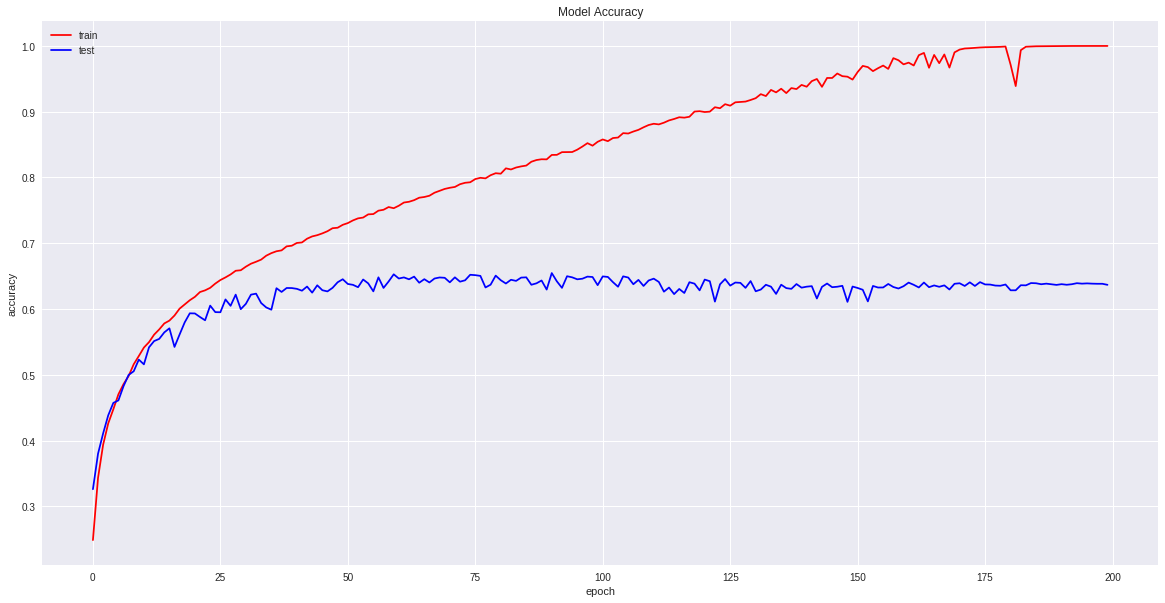

In [73]:
# list all data in history
# summarize history for accuracy
plt.figure(figsize=(20,10))
plt.plot(history_1.history['acc'], color = 'r')
plt.plot(history_1.history['val_acc'], color = 'b')

plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['train', 'test'], loc='upper left')
plt.show()


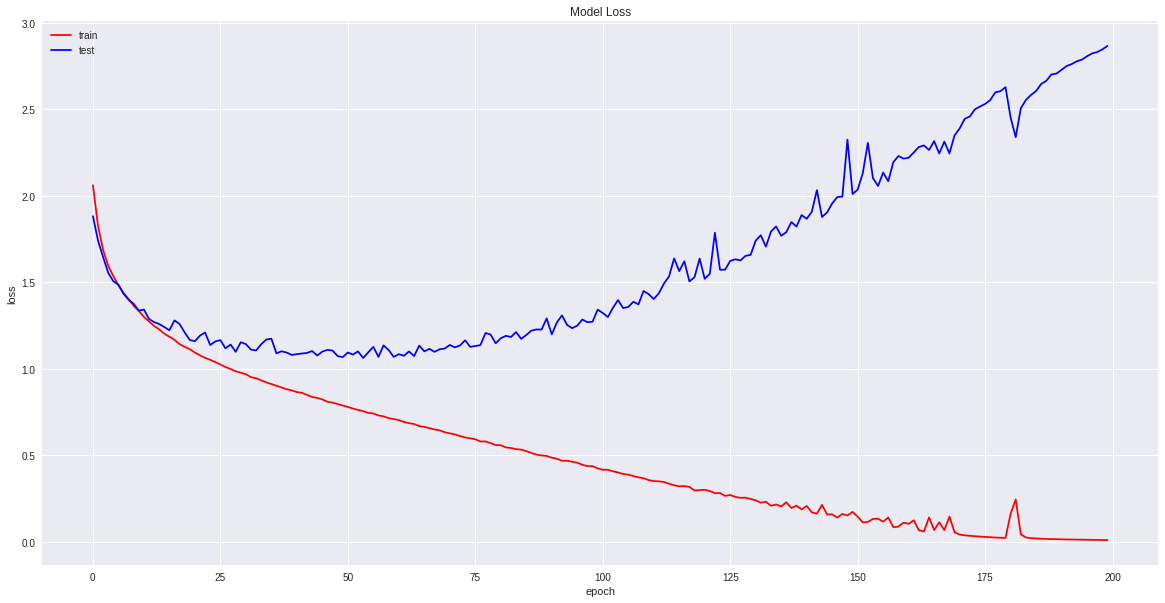

In [74]:
# summarize history for loss
plt.figure(figsize=(20,10))
plt.plot(history_1.history['loss'], color = 'r')
plt.plot(history_1.history['val_loss'], color = 'b')
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()